# 0.0 Imports

In [10]:
import pandas as pd
import numpy as np

import inflection

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf


import warnings
warnings.filterwarnings( 'ignore' )

from IPython.display import display
pd.options.display.max_columns = None

#import seaborn as sns
import sys
  
# adding Folder_2 to the system path
sys.path.insert(0, 'G:\DADOS\Documents\CURSOS_Dev\Tera\Projeto\projeto_acao')

from price_economics_technical_analysis_class import Price_Historical_Data_technical_analysis

#plt.rcParams['figure.figsize'] = [25, 12]
#plt.rcParams['font.size'] = 24

## 0.1 Helper Functions

## 0.2 Loading Data

In [5]:
df_raw = pd.read_csv('../data/raw/df_raw0.csv', parse_dates=['data'], index_col='data')
df_raw.head(3)

,AMBEV,rsi,roc,willr,BRF,EURO,Heineken_euro,JBS,DOLAR,IBOVESPA,cdi,Risco_Brasil,Dividends,selic_meta_diario,selic_overnight_diario,taxa_desemprego_pnad_mensal_diario,volume_vendas_varejo_setor_diario_x,ipca_diario,igpm_diario,volume_vendas_varejo_setor_diario_y,producao_bens_consumo_diario,tx_juros_americano_day,industry_production_daily,desemprego_americano_day,inflacao_americana_daily
data,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-05,0.322,NaN,NaN,NaN,764.274,NaN,23.801,NaN,NaN,16245.0,0.068,677.0,0.0,0.146,0.146,NaN,2.468,0.022,0.056,2.468,NaN,0.088,4.172,0.182,0.263
2000-01-06,0.305,NaN,NaN,NaN,744.420,NaN,25.396,NaN,NaN,16107.0,0.068,688.0,0.0,0.146,0.146,NaN,2.468,0.022,0.056,2.468,NaN,0.088,4.172,0.182,0.263
2000-01-07,0.305,NaN,NaN,NaN,744.420,NaN,25.776,NaN,NaN,16309.0,0.068,677.0,0.0,0.146,0.146,NaN,2.468,0.022,0.056,2.468,NaN,0.088,4.172,0.182,0.263


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5598 entries, 2000-01-05 to 2022-04-14
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   AMBEV                                5598 non-null   float64
 1   rsi                                  5584 non-null   float64
 2   roc                                  5588 non-null   float64
 3   willr                                5585 non-null   float64
 4   BRF                                  4212 non-null   float64
 5   EURO                                 4536 non-null   float64
 6   Heineken_euro                        5572 non-null   float64
 7   JBS                                  3730 non-null   float64
 8   DOLAR                                4148 non-null   float64
 9   IBOVESPA                             5512 non-null   float64
 10  cdi                                  5536 non-null   float64
 11  Risco_Brasil

# 1.0 Descrição dos Dados

In [6]:
df1 = df_raw.copy()

In [5]:
# Data dimensions
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 5598
Number of Cols: 25


In [6]:
# mean % of nulls
df1.isna().mean()*100

AMBEV                                   0.000000
rsi                                     0.250089
roc                                     0.178635
willr                                   0.232226
BRF                                    24.758842
EURO                                   18.971061
Heineken_euro                           0.464452
JBS                                    33.369060
DOLAR                                  25.902108
IBOVESPA                                1.536263
cdi                                     1.107538
Risco_Brasil                            0.392997
Dividends                               0.000000
selic_meta_diario                       0.000000
selic_overnight_diario                  0.160772
taxa_desemprego_pnad_mensal_diario     56.770275
volume_vendas_varejo_setor_diario_x     1.643444
ipca_diario                             0.571633
igpm_diario                             0.571633
volume_vendas_varejo_setor_diario_y     1.643444
producao_bens_consum

In [7]:
# description of numerical data , round(2)
df1.describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
AMBEV,5598.0,7.79,6.38,0.29,1.97,5.22,14.67,17.25,19.57,21.44
rsi,5584.0,46.77,12.78,6.04,38.00,46.54,55.53,67.29,78.44,95.52
roc,5588.0,-0.44,6.00,-36.31,-3.66,-0.66,2.49,8.04,13.74,85.55
willr,5585.0,-53.94,31.83,-100.00,-81.83,-56.58,-25.29,-0.00,0.00,-0.00
BRF,4212.0,52.23,123.04,1.79,19.77,26.10,43.92,65.25,739.46,818.86
EURO,4536.0,3.52,1.18,2.17,2.62,3.16,4.07,6.33,6.63,6.96
Heineken_euro,5572.0,45.67,25.82,15.52,26.14,32.35,71.94,93.41,99.17,104.10
JBS,3730.0,10.65,8.09,2.22,5.60,7.38,11.81,28.84,36.84,38.76
DOLAR,4148.0,2.93,1.19,1.53,1.96,2.41,3.73,5.41,5.67,5.89
IBOVESPA,5512.0,53870.63,29613.29,8371.00,27111.50,53968.00,67638.75,112567.25,122809.67,130776.00


In [7]:
# Change Dividends for binary 
df1['Dividends_boolean'] = df1['Dividends'].apply(lambda x: 0 if x == 0 else 1)

In [8]:
# Drop columns with nulls mean > 50
df1.drop(['taxa_desemprego_pnad_mensal_diario'], axis=1, inplace = True)

In [10]:
# Data dimensions
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 5598
Number of Cols: 25


In [11]:
# Rename Columns
columns_old = df1.columns
snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, columns_old ) )

# rename
df1.columns = cols_new
df1.columns


Index(['ambev', 'rsi', 'roc', 'willr', 'brf', 'euro', 'heineken_euro', 'jbs',
       'dolar', 'ibovespa', 'cdi', 'risco_brasil', 'dividends',
       'selic_meta_diario', 'selic_overnight_diario',
       'volume_vendas_varejo_setor_diario_x', 'ipca_diario', 'igpm_diario',
       'volume_vendas_varejo_setor_diario_y', 'producao_bens_consumo_diario',
       'tx_juros_americano_day', 'industry_production_daily',
       'desemprego_americano_day', 'inflacao_americana_daily',
       'dividends_boolean'],
      dtype='object')

# 2.0 Feature Engineering

In [12]:
df2 = df1.copy()

## 2.1 Hypothesis 

**Cenário Interno**
- quando o risco Brasil aumenta, as ações caem
- quando o risco Brasil aumenta, o volume de negociação diminui
- fatores econômicos influenciam no retorno da ambev

**Cenário Internacional**
- Quanto menor a taxa de juros americana, maior o volume da Ibovespa
- Um bom cenário economico americano impacta no volume ou cotaçao da Ambev

**Ação**
- Existe uma correlação entre a variação da cotação da entre as cervejarias Heineken e Ambev
- Nos dias que antecedem a distrinuição de dividendos, há uma maior procura pela ação da ambev (volume de negociação), influenciando no preço da ação de forma positiva
- A taxa de returno diária da Ambev é maior que o CDI e a inflação
- O retorno acumulado da Heineken é maior que o da Ambev ao longo dos últimos 5 anos
- Historicamente a valorização dos preços da ação da Ambev é maior que a inflação e CDI



## 2.2 Feature Engineering

In [13]:
# convert euro X real
df2['heineken_real'] = (df2.heineken_euro * df2.euro).round(2)

In [14]:
# volume 
import yfinance as yf
import datetime
volume_ambev = yf.download('ABEV3.SA', start = '2000-01-01', end = df2.index[-1])['Volume']
volume_ibovespa = yf.download('^BVSP', start = '2000-01-01', end = df2.index[-1])['Volume']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
volume_ibovespa

Date
2000-01-03           0
2000-01-04           0
2000-01-05           0
2000-01-06           0
2000-01-07           0
                ...   
2022-04-07    11520100
2022-04-08    11225800
2022-04-11     9558400
2022-04-12    11406800
2022-04-13    12070500
Name: Volume, Length: 5513, dtype: int64

In [16]:
df2['volume_ambev'] = volume_ambev
df2['volume_ibovespa'] = volume_ibovespa



In [17]:
df2.tail(2)

,ambev,rsi,roc,willr,brf,euro,heineken_euro,jbs,dolar,ibovespa,cdi,risco_brasil,dividends,selic_meta_diario,selic_overnight_diario,volume_vendas_varejo_setor_diario_x,ipca_diario,igpm_diario,volume_vendas_varejo_setor_diario_y,producao_bens_consumo_diario,tx_juros_americano_day,industry_production_daily,desemprego_americano_day,inflacao_americana_daily,dividends_boolean,heineken_real,volume_ambev,volume_ibovespa
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-04-13,14.83,43.559,-6.255,-71.449,15.78,5.056,87.68,37.45,4.673,116782.0,0.044,296.0,0.0,0.123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,443.31,33771300.0,12070500.0
2022-04-14,14.70,57.786,-1.250,-14.274,15.23,5.107,90.02,38.48,4.690,116182.0,0.044,NaN,0.0,0.123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,459.73,NaN,NaN


# 3.0 EDA

## 3.1 univariada

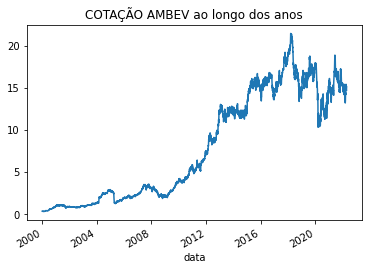

In [18]:
df2.ambev.plot();
plt.title('COTAÇÃO AMBEV ao longo dos anos');

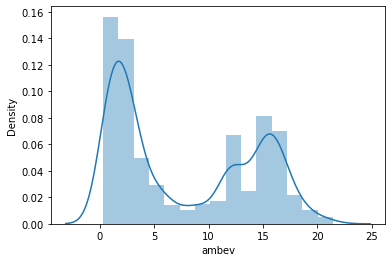

In [19]:
sns.distplot( df2.ambev);

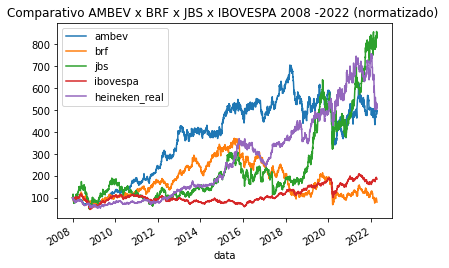

In [20]:
stocks = ['ambev', 'brf', 'jbs', 'ibovespa', 'heineken_real']
prices = df2[df2.index > pd.to_datetime('2008-01-01')][stocks]

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.title('Comparativo AMBEV x BRF x JBS x IBOVESPA 2008 -2022 (normatizado) ')
plt.show()

### H3 Fatores econômicos influenciam no retorno da ambev

[*********************100%***********************]  1 of 1 completed


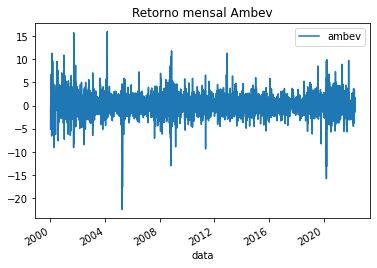

In [14]:
# Ambev montly returns 
data = Price_Historical_Data_technical_analysis()
ambev_monthly =  data.cotacao_conjunto_acao_somente_adj_close('ABEV3.SA', '2000-01-01',  df2.index[-1], interval='1mo'  )
ambev_monthly = ambev_monthly.to_frame()

ambev_monthly.rename({'Adj Close': 'ambev'}, axis = 1, inplace = True)
ambev_monthly.index.name = 'data'
ambev_monthly_return = ambev_monthly.pct_change().mul(100)
ambev_monthly_return.plot()
plt.legend();
plt.title('Retorno mensal Ambev');

In [15]:
indicadores_economicos = pd.read_csv('../data/external/indicadores_economicos_mensal_br.csv', parse_dates=['data'], index_col='data')
indicadores_economicos.sample(2)


,ipca_alimentos_bebidas,ipca_mensal,igpm,selic_meta_mensal,selic_overnight_mensal,taxa_desemprego_pnad_mensal,indice_volume_vendas_varejo_setor_mensal,indice_producao_bens_consumo_mensal
data,,,,,,,,
2002-06-01,0.08,0.42,1.54,18.50,18.10,NaN,55.0,77.8
2006-03-01,-0.24,0.43,-0.23,17.25,16.74,NaN,63.4,92.1


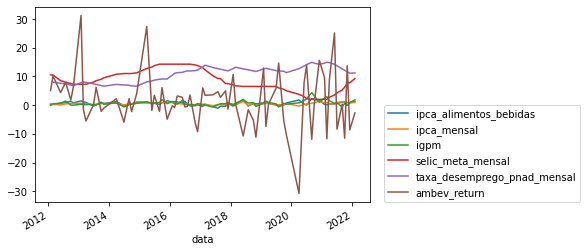

In [16]:
data = pd.merge(ambev_monthly,indicadores_economicos, on= 'data' )

data_interpolated = data.interpolate()

#Calculando retorno da Ambev
data_interpolated['ambev_return'] = data_interpolated.ambev.pct_change()*100
data_interpolated.drop(['ambev', 'indice_volume_vendas_varejo_setor_mensal', 'indice_producao_bens_consumo_mensal', 'selic_overnight_mensal'], 1, inplace=True)

data_interpolated.loc['2012':].plot();
plt.legend(loc=(1.04,0));


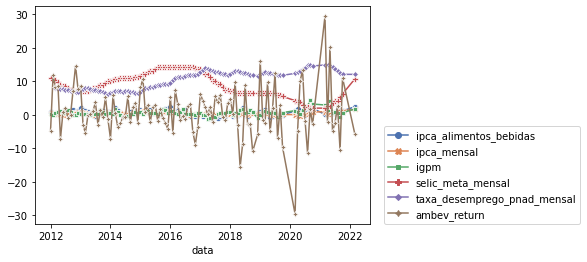

In [24]:

#pal = sns.color_palette("mako_r",7)
sns.lineplot(data=data_interpolated.loc['2012':], palette='deep', dashes= False, markers=True);
plt.legend(loc=(1.04,0));

<AxesSubplot:xlabel='data', ylabel='ambev'>

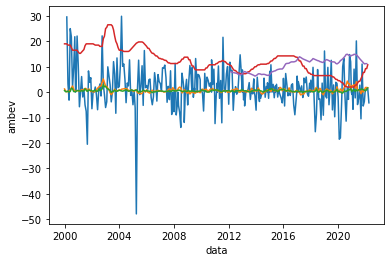

In [25]:
sns.lineplot(y='ambev', x= ambev_monthly_return.index,  data= ambev_monthly_return )
sns.lineplot(y='igpm', x= indicadores_economicos.index,  data= indicadores_economicos)
sns.lineplot(y='ipca_mensal', x= indicadores_economicos.index,  data= indicadores_economicos)
sns.lineplot(y='selic_meta_mensal', x= indicadores_economicos.index,  data= indicadores_economicos)
sns.lineplot(y='taxa_desemprego_pnad_mensal', x= indicadores_economicos.index,  data= indicadores_economicos)


In [26]:
import statsmodels.formula.api as smf

In [27]:
X = data_interpolated

In [28]:
intervalo = data_interpolated.loc['2012':]
intervalo.taxa_desemprego_pnad_mensal.fillna(intervalo.taxa_desemprego_pnad_mensal.mean(), inplace = True)
intervalo.head()

,ipca_alimentos_bebidas,ipca_mensal,igpm,selic_meta_mensal,taxa_desemprego_pnad_mensal,ambev_return
data,,,,,,
2012-01-01,0.86,0.56,0.25,11.00,10.442593,-4.761892
2012-02-01,0.19,0.45,-0.06,10.50,10.442593,11.769274
2012-03-01,0.25,0.21,0.43,10.50,8.000000,8.344762
2012-04-01,0.51,0.64,0.85,9.75,7.800000,8.520115
2012-05-01,0.73,0.36,1.02,9.00,7.700000,-7.150248


<AxesSubplot:>

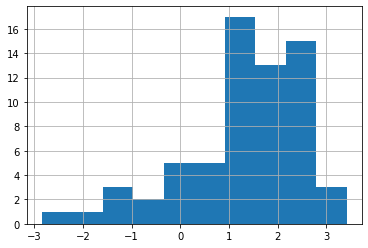

In [29]:
intervalo['logambev_return'] = np.log1p(intervalo['ambev_return'])
intervalo['logambev_return'].hist()

In [30]:
reg_linear1 = smf.ols(formula='logambev_return ~ ipca_alimentos_bebidas+ ipca_mensal+ igpm+ selic_meta_mensal + taxa_desemprego_pnad_mensal ', data=intervalo).fit()
reg_linear1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        logambev_return   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.562
Date:                Wed, 27 Apr 2022   Prob (F-statistic):             0.0365
Time:                        14:28:48   Log-Likelihood:                -97.878
No. Observations:                  65   AIC:                             207.8
Df Residuals:                      59   BIC:                             220.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.8323      0.868      0.959      0.341      -0.904       2.569
ipca_alimentos_bebidas         -0.1243      0.298     -0.417      0.678      -0.721       0.472
ipca_mensal                     1.0926      0.588      1.860      0.068      -0.083       2.268
igpm                           -0.2376      0.192     -1.238      0.221      -0.622       0.146
selic_meta_mensal              -0.1111      0.049     -2.256      0.028      -0.210      -0.013
taxa_desemprego_pnad_mensal     0.1213      0.059      2.068      0.043       0.004       0.239
==============================================================================
Omnibus:                       16.457   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.992
Skew:                          -1.222   Prob(JB):                     7.52e-05
Kurtosis:                       4.017   Cond. No.                         86.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(reg_linear1.model.exog, i) for i in range(1, reg_linear1.model.exog.shape[1])]
vif["Variable"]   = reg_linear1.model.exog_names[1:]
print(vif)

   VIF Factor                     Variable
0    2.029132       ipca_alimentos_bebidas
1    1.977817                  ipca_mensal
2    1.577246                         igpm
3    1.301675            selic_meta_mensal
4    1.270866  taxa_desemprego_pnad_mensal


In [17]:
#Diagnóstico
